<a id='home'></a>
### purpose

create code for figs of glevel vs plevel nested in marker_set - 2 trait sims only

### conclusions

1. glevel vs plevel
    individual methods
    - RONA temp and sal performed similarly across 2-trait sims, though sal did slightly better
    - lfmm2 
        - showed similar performance across categories
        - had fewer positive validation scores for highly polygenic architectures
    - GF - TODO once all sims finish
    - RDA
        - when correcting for structure, performance of true outlier markers decrease while non-true outliers increase (relative to no correction) - and neutral markers perform best
            - fewer positive validation scores for oligogenic sims (compared to no correction)
        - when not correcting for structure true outliers perform better than other marker sets, though the difference in performance is less so for highly polygenic architectures
            - oligogenic sims had more positive values than other architectures

    comparing methods
    - RDA and GF generally had negative validation scores, while the other methods had some gardens with positive relationships between offset and fitness
    
1. glevel vs slevel (TODO)

1. glevel vs popsize (TODO)

1. glevel vs migration (TODO)

In [1]:
from pythonimports import *

import MVP_summary_functions as mvp

import seaborn as sns
from functools import partial
plt.rcParams.update({'font.family' : 'serif'})

summarydir = '/work/lotterhos/MVP-Offsets/run_20220919/summaries'
figdir = makedir(op.join(summarydir, 'figs/01_glevel_vs_other'))
pkldir = makedir(op.join(summarydir, 'all_performance_dicts'))

t1 = dt.now()  # notebook timer

mvp.latest_commit()
session_info.show()

#########################################################
Today:	June 28, 2023 - 14:16:36 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit eb8d204ff9a40e48b07c184bcc4ff8621804cde6  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Thu Jun 15 14:34:48 2023 -0400

Current commit of MVP_offsets:
commit dcaf4a98ad33a59e3d371eed0bb26b1885505dcf  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Sat Jun 24 12:25:29 2023 -0400
#########################################################



In [2]:
# get validation scores across gardens across reps
all_scores = mvp.combine_level_dicts(use_bcs_data=False, remove_rda_outliers=False)

filtering criteria:
	use_bcs_data = False
	performance = garden_performance
	num_traits = None
	ntraits = None
	marker_set = None
	remove_structcrxn = False
	keep_nuisance = True
	remove_rda_outliers = False


reading reps: 100%|███████████████| 10/10 [00:18<00:00,  1.89s/it]


0-225
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


225-450
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


450-675
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


675-900
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


900-1125
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1125-1350
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1350-1575
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1575-1800
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1800-2025
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


2025-2250
	 RONA num seeds =  225
	 lfmm2 num seeds =  22

In [3]:
programs = keys(all_scores)

programs

['RONA', 'lfmm2', 'GF', 'rda']

In [4]:
all_scores['GF'].head()

,garden,score,glevel,plevel,pleio,slevel,landscape,popsize,migration,marker_set,seed,simulation_level,noncausal_env,offset_level,program,rep,simulation_garden,final_LA,cor_TPR_temp,cor_TPR_sal,cor_FPR_temp_neutSNPs,cor_FPR_sal_neutSNPs,plevel_pleio,demography
1231094,1,-0.906263,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-center-to-edge,m-constant,adaptive,1231094,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,1-trait 2-envs,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,GF,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.500854,0.46129,NaN,0.521256,0.0,1-trait_no pleiotropy,N-cline-center-to-edge_m-constant
1231094,2,-0.906263,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-center-to-edge,m-constant,adaptive,1231094,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,1-trait 2-envs,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,GF,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.500854,0.46129,NaN,0.521256,0.0,1-trait_no pleiotropy,N-cline-center-to-edge_m-constant
1231094,3,-0.903030,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-center-to-edge,m-constant,adaptive,1231094,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,1-trait 2-envs,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,GF,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.500854,0.46129,NaN,0.521256,0.0,1-trait_no pleiotropy,N-cline-center-to-edge_m-constant
1231094,4,-0.901414,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-center-to-edge,m-constant,adaptive,1231094,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,1-trait 2-envs,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,GF,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.500854,0.46129,NaN,0.521256,0.0,1-trait_no pleiotropy,N-cline-center-to-edge_m-constant
1231094,5,-0.893333,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-center-to-edge,m-constant,adaptive,1231094,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,1-trait 2-envs,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,GF,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.500854,0.46129,NaN,0.521256,0.0,1-trait_no pleiotropy,N-cline-center-to-edge_m-constant


# functions for creating figs

In [5]:
def generic_glevel_fig(program, data, hue=None, hue_order=None, add_title='', filename=None, keep_nuisance=False):
    """Explore effect on validation scores for *hue* nested within marker_set nested within architecture."""
    print(program)

#     # remove nuisance envs
#     if keep_nuisance is False and 'noncausal_env' in data.columns:
#         data = data[data.noncausal_env != '1-trait 2-envs'].copy()  # allows np.nan from RONA

    # remove nuisance envs
    data = mvp.subset_dataframe(data, keep_nuisance=keep_nuisance, remove_rda_outliers=False)
    
    # so RDA outliers label looks nice
    data['marker_set'] = data['marker_set'].str.replace(' ', '\n')
    
    # create fig
    g = sns.catplot(data=data,
                    x='marker_set',
                    y='score',
                    order=sorted(data['marker_set'].unique()),  # x order
                    col='glevel',
                    col_order=mvp.hue_order['glevel'], # ['oligogenic', 'mod-polygenic', 'highly-polygenic'],
                    kind='box',
                    hue=hue,
                    hue_order=hue_order,
#                     height=4,
#                     aspect=0.75,
                    margin_titles=False,
                    legend=False,
                    **mvp.boxplot_kwargs)
    
    g.figure.set_size_inches((8, 3))
    
    g.set(ylim=(0.65, -1),
          yticks=mvp.ytick_labels,
          yticklabels=mvp.ytick_labels)
    
    mvp.add_legend(g.figure, color_by=hue, loc='upper center', bbox_to_anchor=(0.5365, 1.15), fontsize=9,
                   ncol='auto'
                  )
    
    mvp.pretty_facetgrid(g,
                         program,
                         num_levels=luni(data.simulation_level),
                         num_reps=luni(data.rep),
                         add_title=add_title,
                         saveloc=op.join(figdir,
                                         filename if filename is not None else f'summary_{program}.pdf'),
                         center=0.5365
                        )
    
    pass

# glevel vs plevel

pleiotropy nested in marker set nested in architecture (2-trait sims only)

In [6]:
# pleiotropy nested in marker_set nested in glevel
glevel_plevel_fig = partial(generic_glevel_fig,
                            hue='pleio',
                            hue_order=mvp.hue_order['pleio'],
#                             bbox_to_anchor=(0.5365, 1.15)
                           )

In [7]:
# these are uninformative for 1-trait sims since they do not have pleiotropy
# mvp.run_facetgrid_figs(glevel_plevel_fig, 'glevel_plevel_fig', all_scores, plevel='1-trait')

glevel_plevel_fig 


RONA
RONA
num_levels = 180 num_reps = 10
2-trait sims
temp only
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_RONA_garden_performance_2-trait_temp_only.pdf


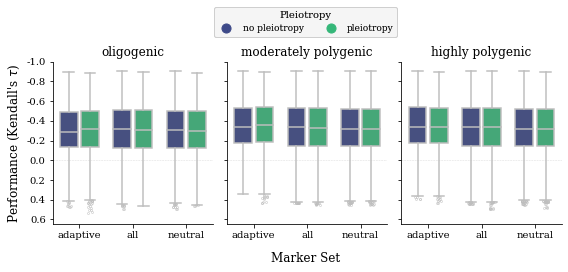

RONA
RONA
num_levels = 180 num_reps = 10
2-trait sims
sal only
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_RONA_garden_performance_2-trait_sal_only.pdf


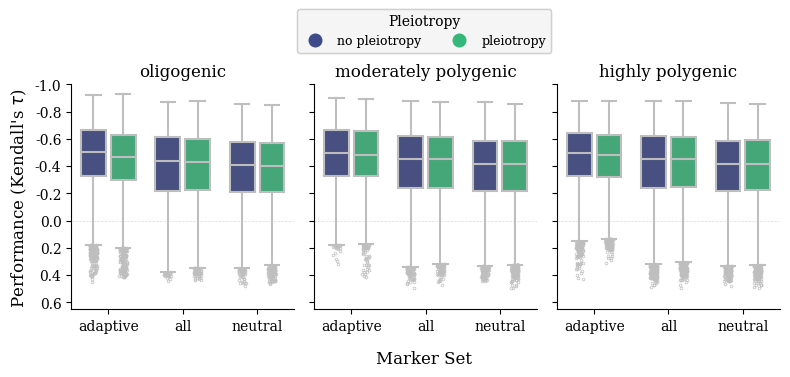

RONA
RONA
num_levels = 180 num_reps = 10
2-trait sims
both envs
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_RONA_garden_performance_2-trait_both_envs.pdf


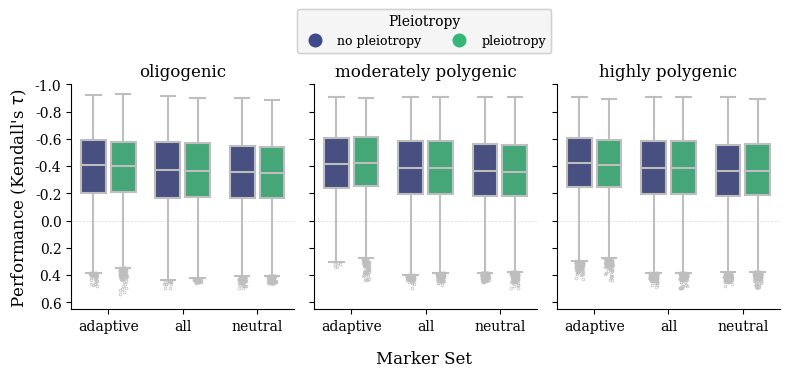

lfmm2
lfmm2
num_levels = 180 num_reps = 10
2-trait sims
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_lfmm2_garden_performance_2-trait.pdf


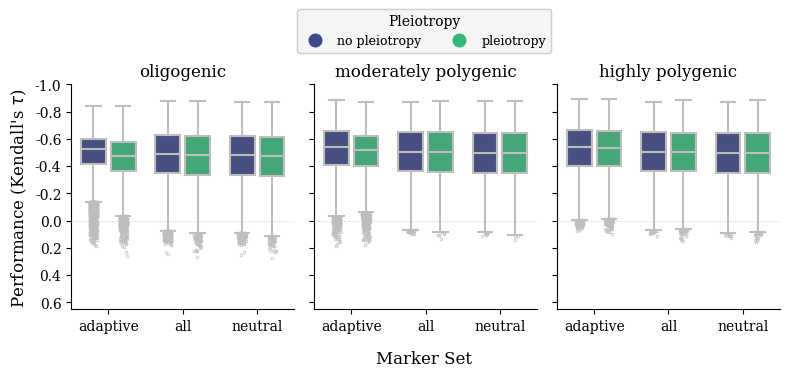

GF
GF
num_levels = 180 num_reps = 10
2-trait sims
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_GF_garden_performance_2-trait.pdf


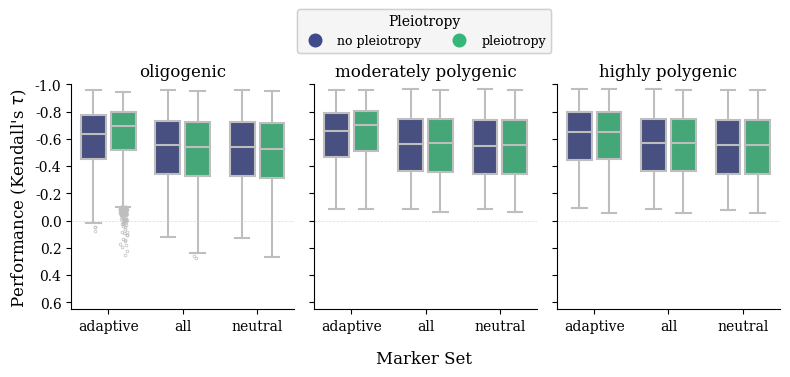

rda
rda
num_levels = 180 num_reps = 10
2-trait sims
structure corr + uncorr
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_rda_garden_performance_2-trait_structure_corr_+_uncorr.pdf


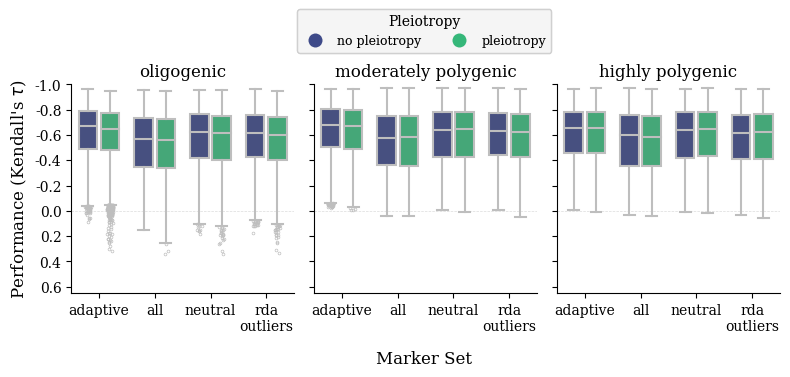

rda
rda
num_levels = 180 num_reps = 10
2-trait sims
uncorrected for structure
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_rda_garden_performance_2-trait_nocorr.pdf


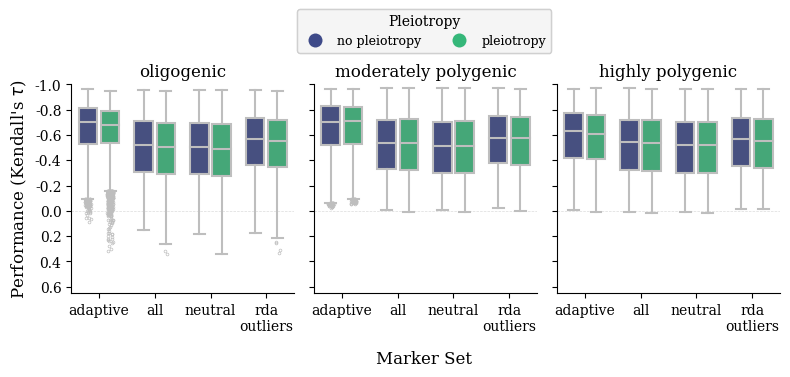

rda
rda
num_levels = 180 num_reps = 10
2-trait sims
corrected for structure
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_rda_garden_performance_2-trait_structcorr.pdf


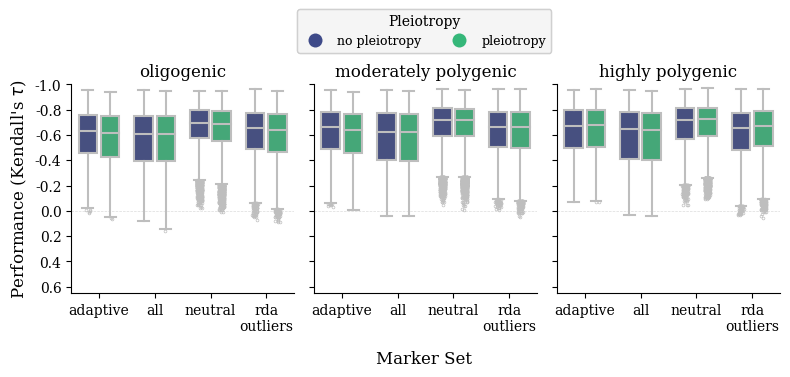

In [8]:
mvp.run_facetgrid_figs(glevel_plevel_fig, 'glevel_plevel_fig', all_scores, plevel='2-trait')

# glevel vs slevel

selection nested in marker set nested in architecture (2-trait sims only)

In [9]:
# selection nested in marker_set nested in glevel
glevel_slevel_fig = partial(generic_glevel_fig,
                            hue='slevel',
                            hue_order=mvp.hue_order['slevel'],
#                             bbox_to_anchor=(0.5365, 1.15)
                           )  # ['equal-S', 'unequal-S'])

In [10]:
# doesn't make sense to run this since slevel only applies to 2-trait sims
# mvp.run_facetgrid_figs(glevel_slevel_fig, 'glevel_slevel_fig', all_scores, plevel='1-trait')

glevel_slevel_fig 


RONA
RONA
num_levels = 180 num_reps = 10
2-trait sims
temp only
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_RONA_garden_performance_2-trait_temp_only.pdf


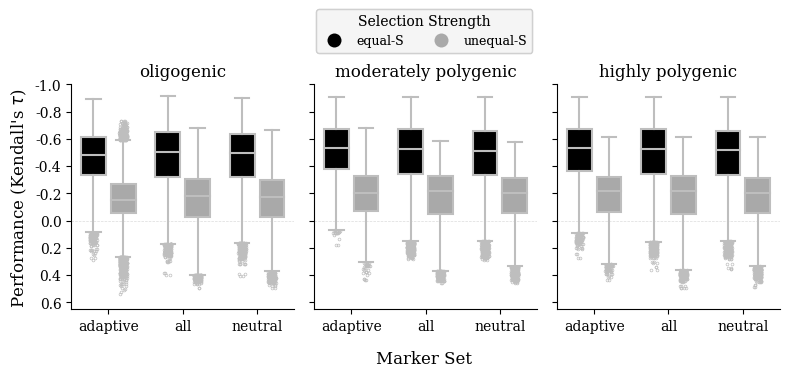

RONA
RONA
num_levels = 180 num_reps = 10
2-trait sims
sal only
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_RONA_garden_performance_2-trait_sal_only.pdf


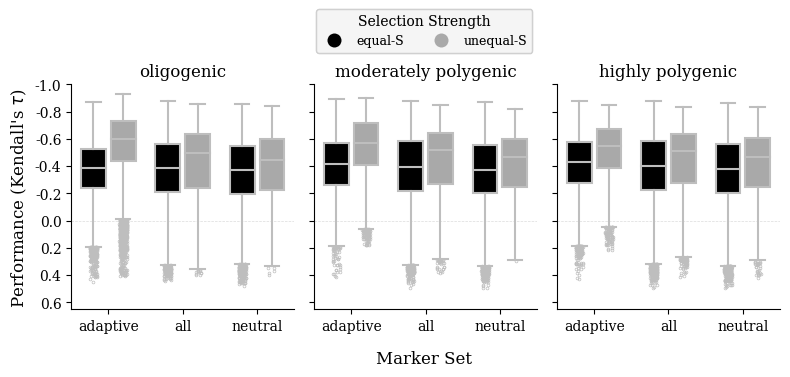

RONA
RONA
num_levels = 180 num_reps = 10
2-trait sims
both envs
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_RONA_garden_performance_2-trait_both_envs.pdf


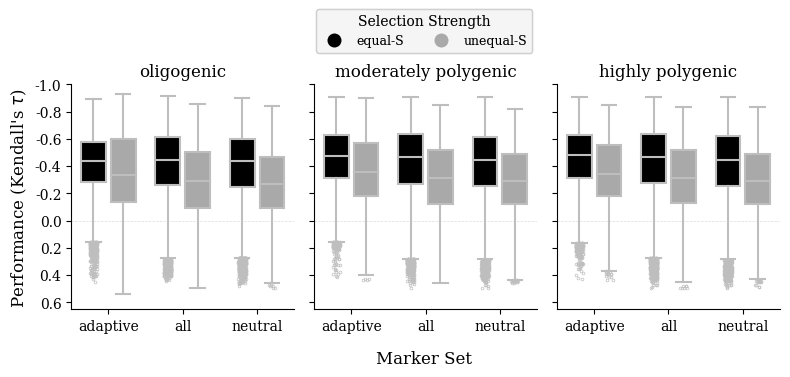

lfmm2
lfmm2
num_levels = 180 num_reps = 10
2-trait sims
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_lfmm2_garden_performance_2-trait.pdf


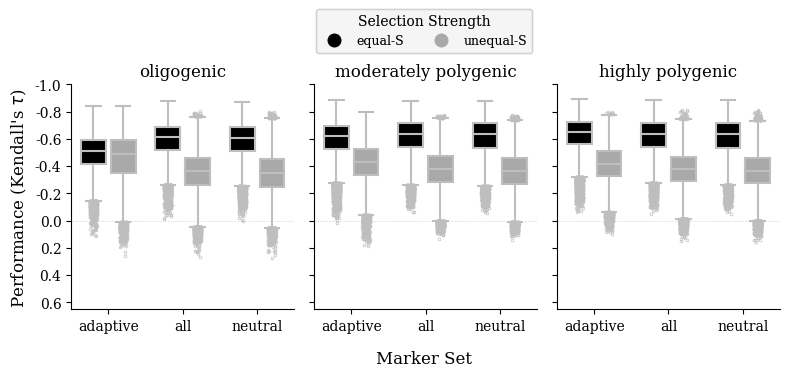

GF
GF
num_levels = 180 num_reps = 10
2-trait sims
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_GF_garden_performance_2-trait.pdf


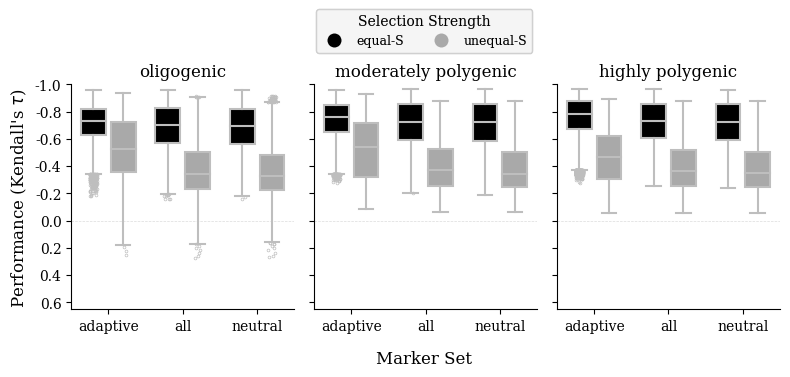

rda
rda
num_levels = 180 num_reps = 10
2-trait sims
structure corr + uncorr
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_rda_garden_performance_2-trait_structure_corr_+_uncorr.pdf


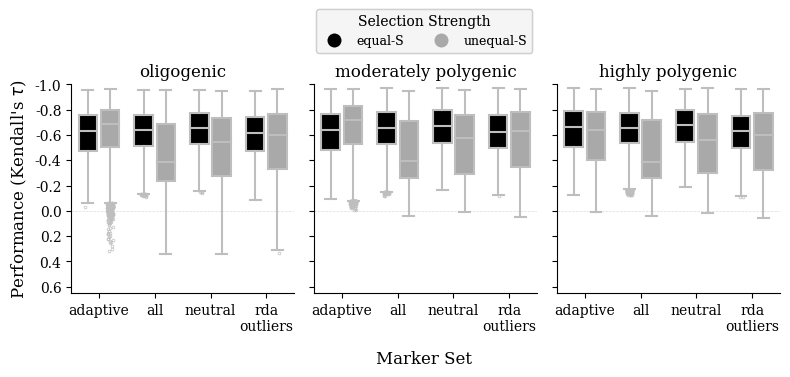

rda
rda
num_levels = 180 num_reps = 10
2-trait sims
uncorrected for structure
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_rda_garden_performance_2-trait_nocorr.pdf


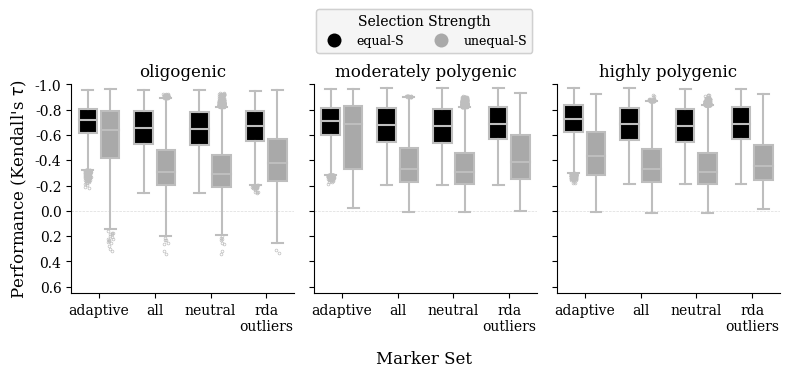

rda
rda
num_levels = 180 num_reps = 10
2-trait sims
corrected for structure
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_rda_garden_performance_2-trait_structcorr.pdf


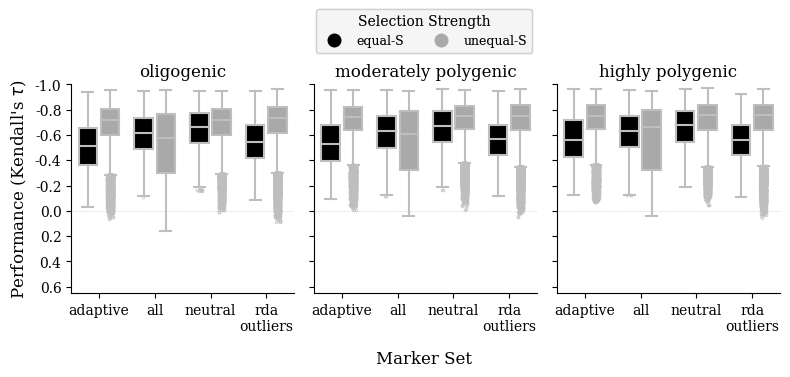

In [11]:
mvp.run_facetgrid_figs(glevel_slevel_fig, 'glevel_slevel_fig', all_scores, plevel='2-trait')

# glevel vs popsize
popsize nested in marker set nested in architecture (2-trait sims only)

In [12]:
# popsize nested in marker_set nested in glevel
glevel_popsize_fig = partial(generic_glevel_fig,
                             hue='popsize',
                             hue_order=mvp.hue_order['popsize'],
#                             bbox_to_anchor=(0.5365, 1.15)
                            )  # ['N-equal', 'N-variable', 'N-cline-center-to-edge', 'N-cline-N-to-S'])

glevel_popsize_fig 


RONA
RONA
num_levels = 45 num_reps = 10
1-trait sims
temp only
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_RONA_garden_performance_1-trait_temp_only.pdf


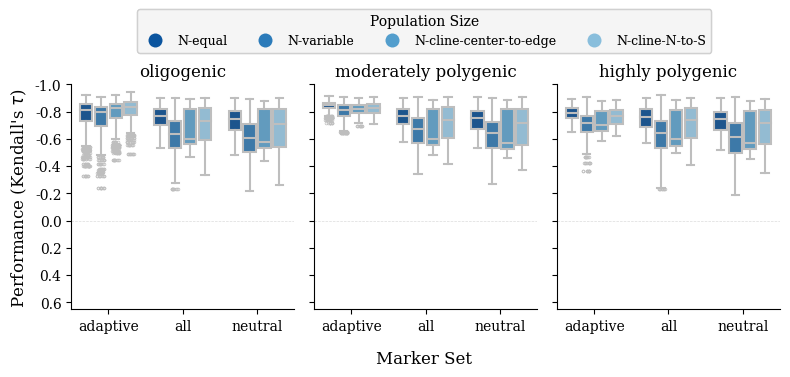

RONA
RONA
num_levels = 0 num_reps = 0
1-trait sims
sal only
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_RONA_garden_performance_1-trait_sal_only.pdf


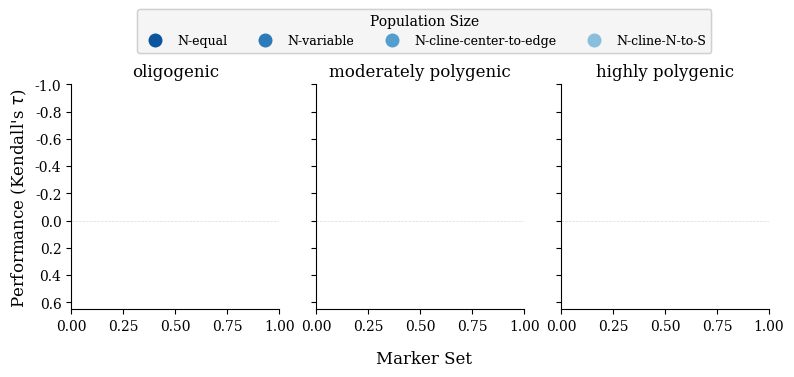

RONA
RONA
num_levels = 45 num_reps = 10
1-trait sims
both envs
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_RONA_garden_performance_1-trait_both_envs.pdf


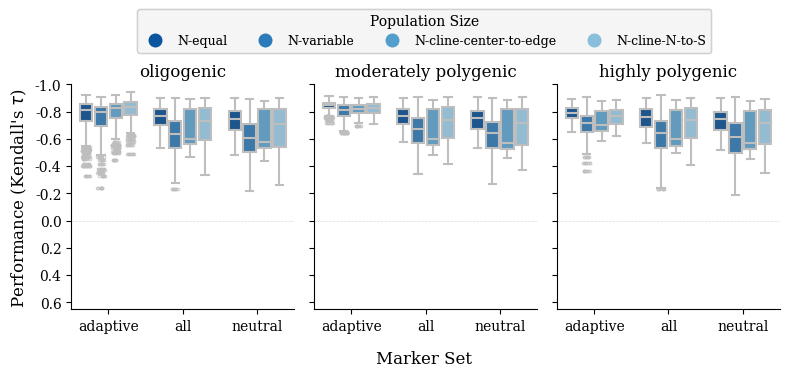

lfmm2
lfmm2
num_levels = 45 num_reps = 10
1-trait sims
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_lfmm2_garden_performance_1-trait.pdf


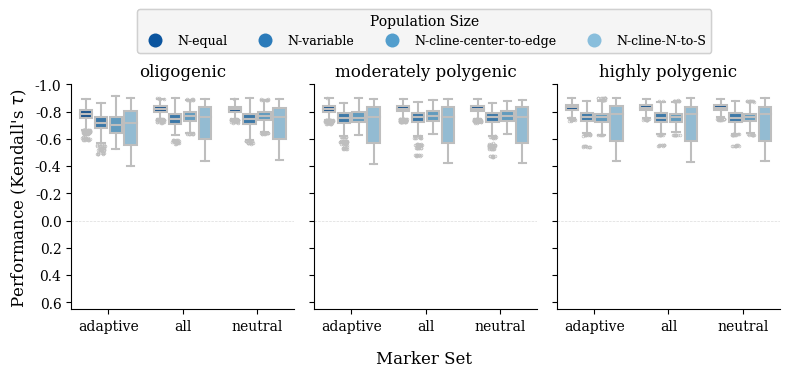

GF
GF
num_levels = 45 num_reps = 10
1-trait sims
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_GF_garden_performance_1-trait.pdf


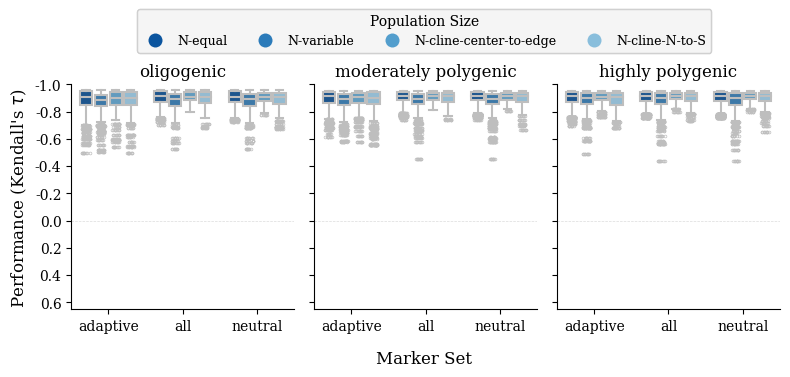

rda
rda
num_levels = 45 num_reps = 10
1-trait sims
structure corr + uncorr
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_rda_garden_performance_1-trait_structure_corr_+_uncorr.pdf


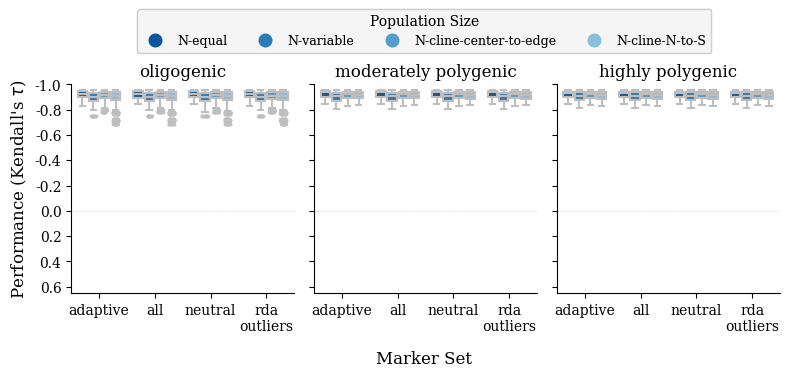

rda
rda
num_levels = 45 num_reps = 10
1-trait sims
uncorrected for structure
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_rda_garden_performance_1-trait_nocorr.pdf


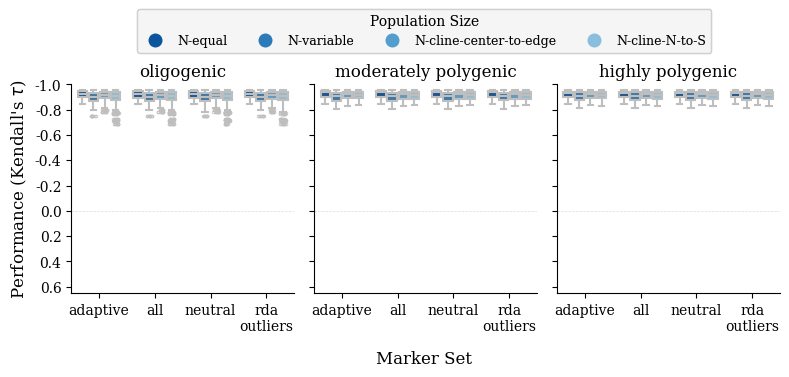

rda
rda
num_levels = 45 num_reps = 10
1-trait sims
corrected for structure
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_rda_garden_performance_1-trait_structcorr.pdf


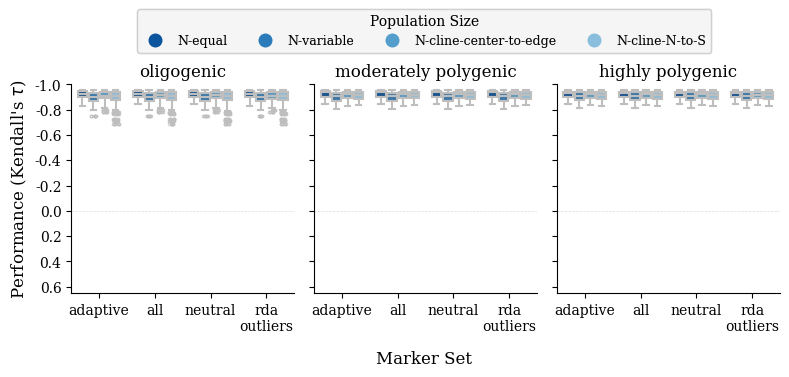

In [13]:
mvp.run_facetgrid_figs(glevel_popsize_fig, 'glevel_popsize_fig', all_scores, plevel='1-trait')

glevel_popsize_fig 


RONA
RONA
num_levels = 180 num_reps = 10
2-trait sims
temp only
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_RONA_garden_performance_2-trait_temp_only.pdf


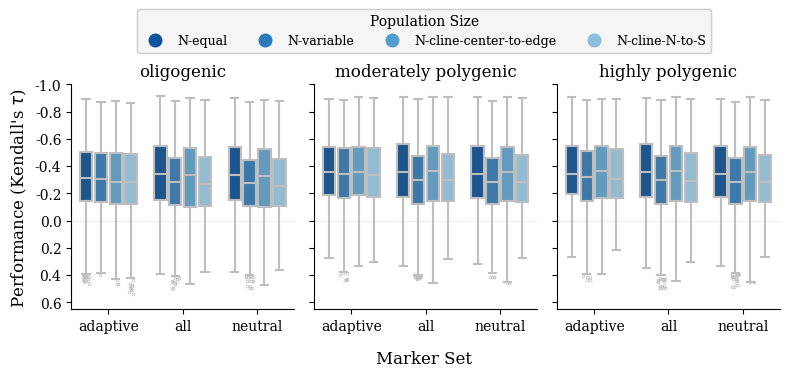

RONA
RONA
num_levels = 180 num_reps = 10
2-trait sims
sal only
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_RONA_garden_performance_2-trait_sal_only.pdf


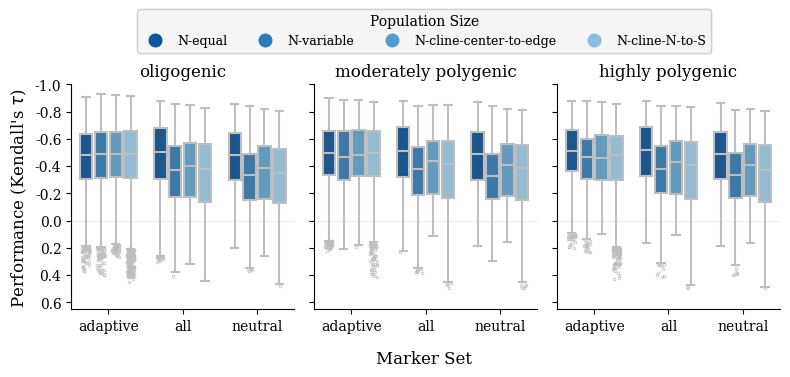

RONA
RONA
num_levels = 180 num_reps = 10
2-trait sims
both envs
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_RONA_garden_performance_2-trait_both_envs.pdf


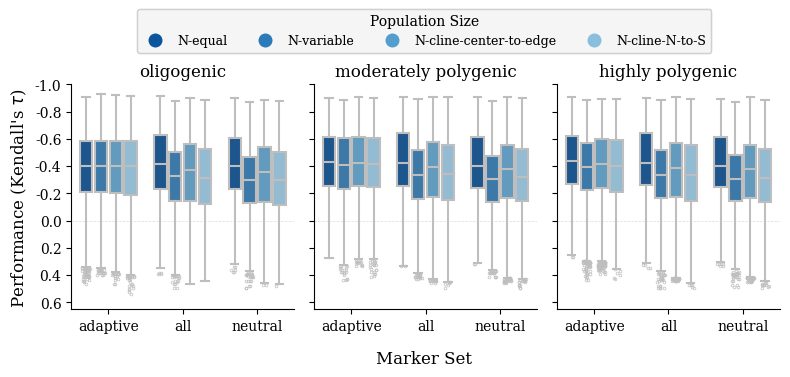

lfmm2
lfmm2
num_levels = 180 num_reps = 10
2-trait sims
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_lfmm2_garden_performance_2-trait.pdf


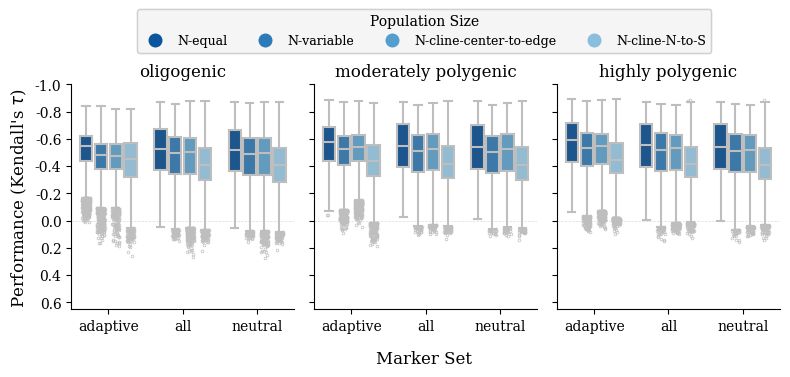

GF
GF
num_levels = 180 num_reps = 10
2-trait sims
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_GF_garden_performance_2-trait.pdf


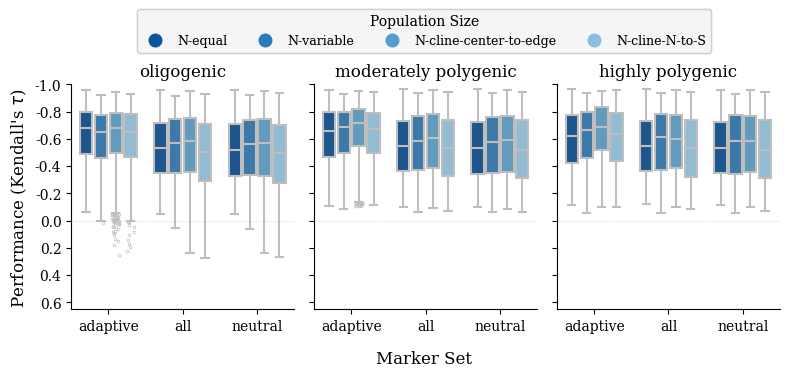

rda
rda
num_levels = 180 num_reps = 10
2-trait sims
structure corr + uncorr
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_rda_garden_performance_2-trait_structure_corr_+_uncorr.pdf


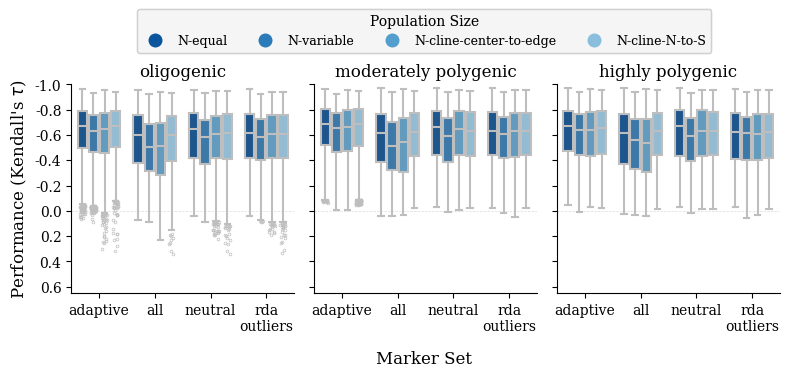

rda
rda
num_levels = 180 num_reps = 10
2-trait sims
uncorrected for structure
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_rda_garden_performance_2-trait_nocorr.pdf


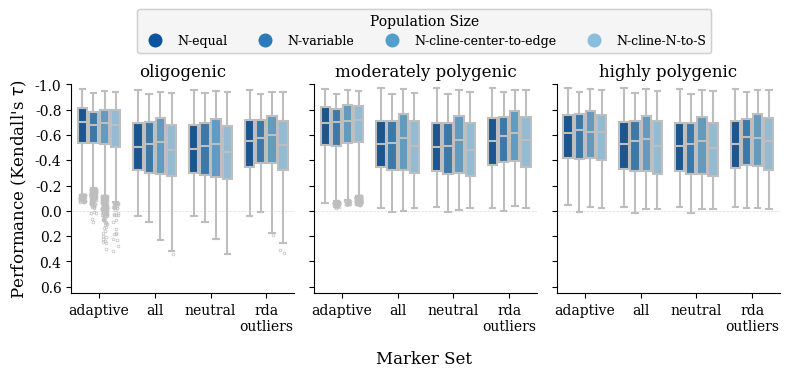

rda
rda
num_levels = 180 num_reps = 10
2-trait sims
corrected for structure
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_rda_garden_performance_2-trait_structcorr.pdf


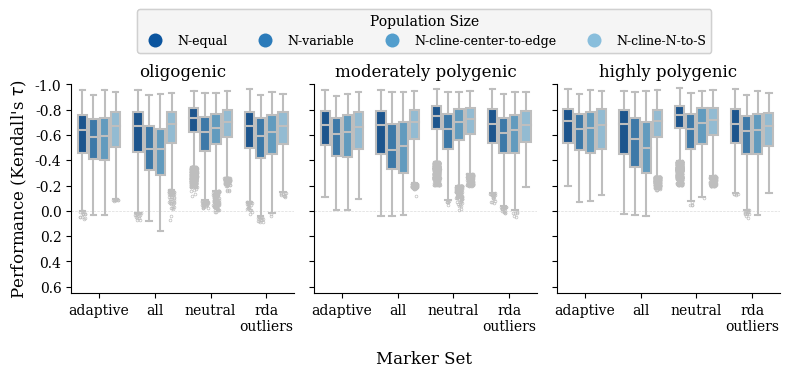

In [14]:
mvp.run_facetgrid_figs(glevel_popsize_fig, 'glevel_popsize_fig', all_scores, plevel='2-trait')

# glevel vs migration
migration nested in marker set nested in architecture (2-trait sims only)

In [15]:
# migration nested in marker_set nested in glevel
glevel_migration_fig = partial(generic_glevel_fig,
                               hue='migration',
                               hue_order=mvp.hue_order['migration'],
#                                bbox_to_anchor=(0.5365, 1.15)
                              )  # ['m-constant', 'm-variable', 'm-breaks'])

glevel_migration_fig 


RONA
RONA
num_levels = 45 num_reps = 10
1-trait sims
temp only
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_RONA_garden_performance_1-trait_temp_only.pdf


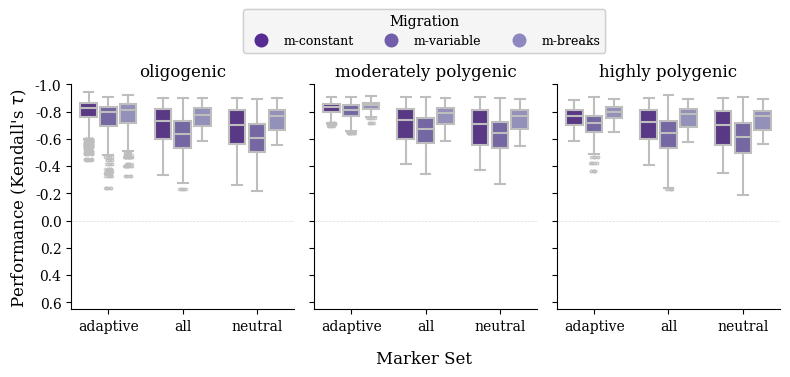

RONA
RONA
num_levels = 0 num_reps = 0
1-trait sims
sal only
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_RONA_garden_performance_1-trait_sal_only.pdf


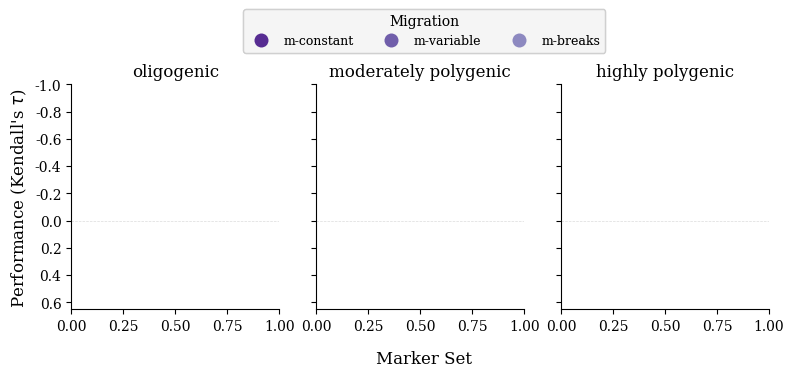

RONA
RONA
num_levels = 45 num_reps = 10
1-trait sims
both envs
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_RONA_garden_performance_1-trait_both_envs.pdf


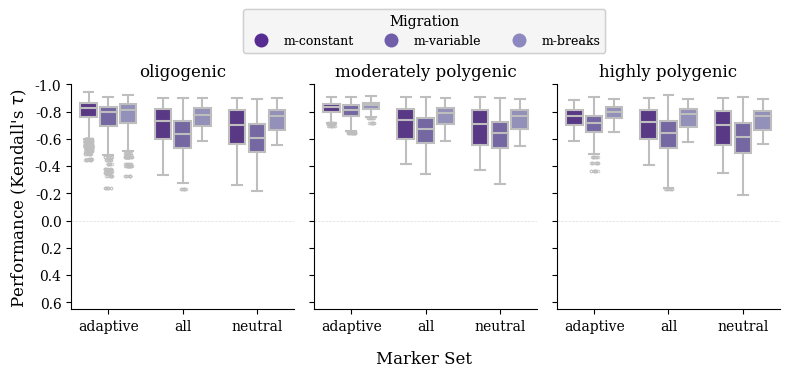

lfmm2
lfmm2
num_levels = 45 num_reps = 10
1-trait sims
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_lfmm2_garden_performance_1-trait.pdf


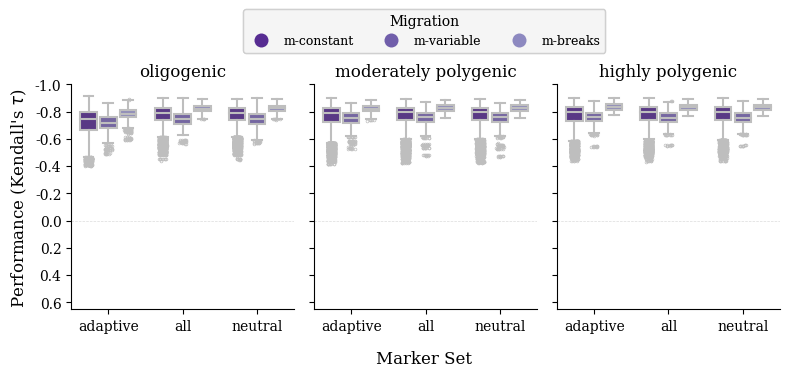

GF
GF
num_levels = 45 num_reps = 10
1-trait sims
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_GF_garden_performance_1-trait.pdf


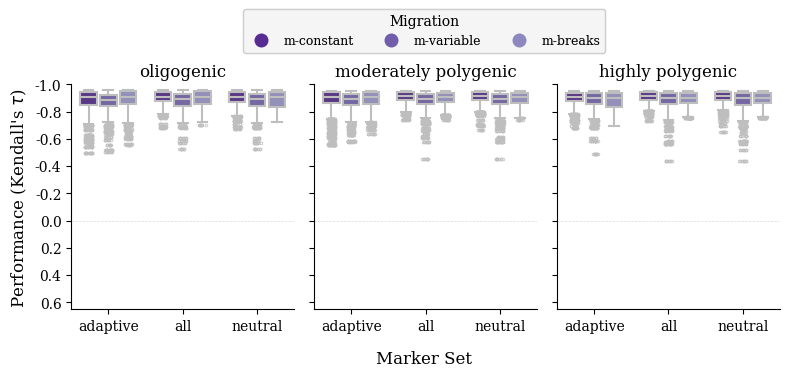

rda
rda
num_levels = 45 num_reps = 10
1-trait sims
structure corr + uncorr
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_rda_garden_performance_1-trait_structure_corr_+_uncorr.pdf


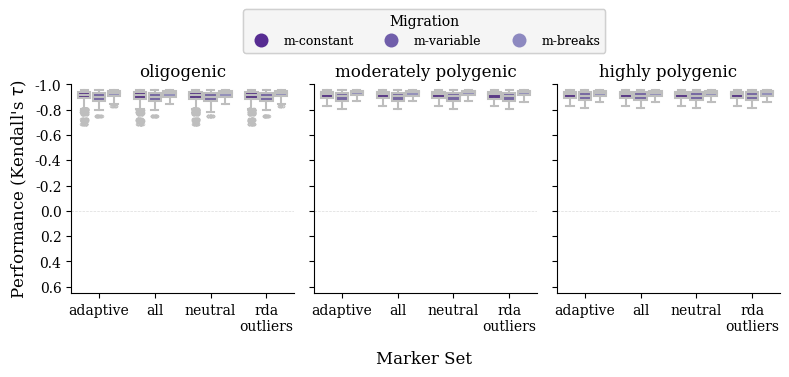

rda
rda
num_levels = 45 num_reps = 10
1-trait sims
uncorrected for structure
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_rda_garden_performance_1-trait_nocorr.pdf


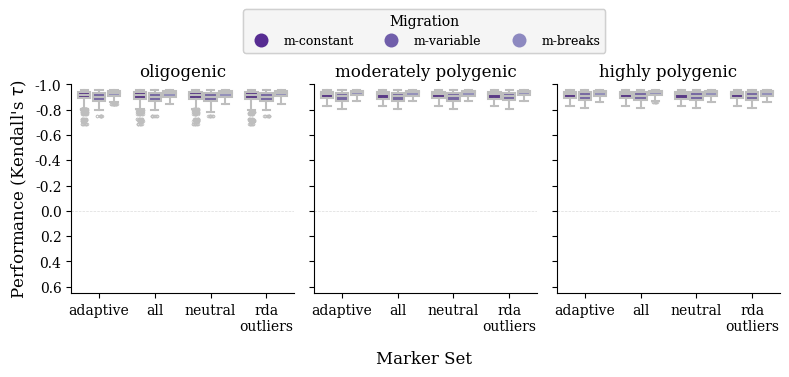

rda
rda
num_levels = 45 num_reps = 10
1-trait sims
corrected for structure
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_rda_garden_performance_1-trait_structcorr.pdf


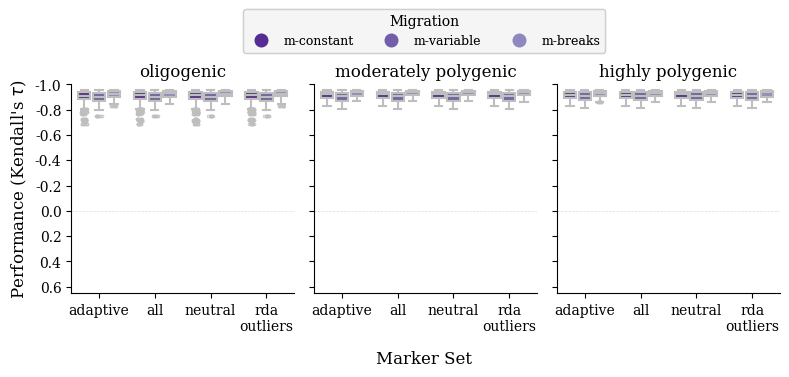

In [16]:
mvp.run_facetgrid_figs(glevel_migration_fig, 'glevel_migration_fig', all_scores, plevel='1-trait')

glevel_migration_fig 


RONA
RONA
num_levels = 180 num_reps = 10
2-trait sims
temp only
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_RONA_garden_performance_2-trait_temp_only.pdf


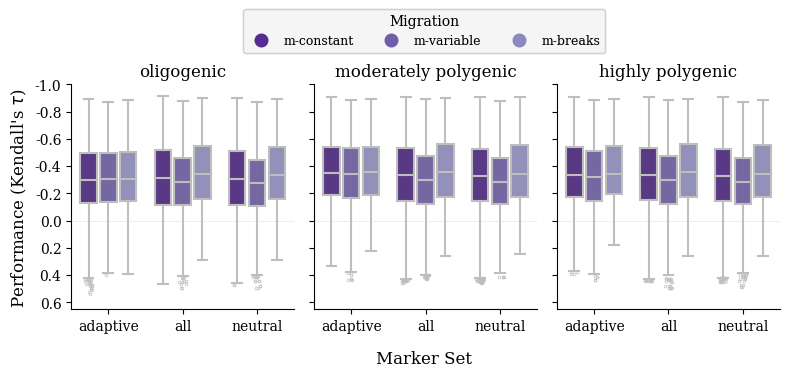

RONA
RONA
num_levels = 180 num_reps = 10
2-trait sims
sal only
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_RONA_garden_performance_2-trait_sal_only.pdf


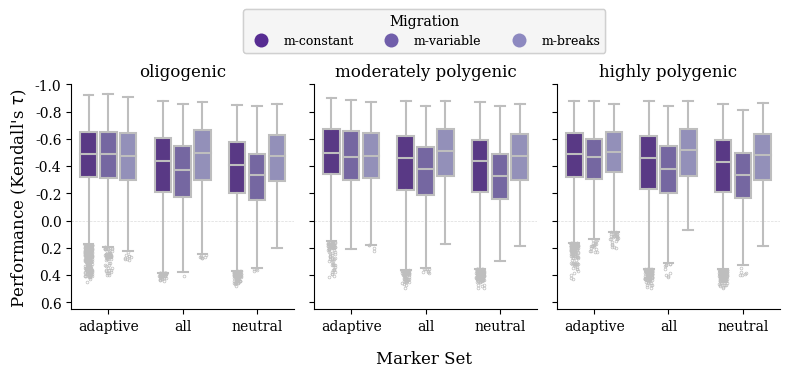

RONA
RONA
num_levels = 180 num_reps = 10
2-trait sims
both envs
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_RONA_garden_performance_2-trait_both_envs.pdf


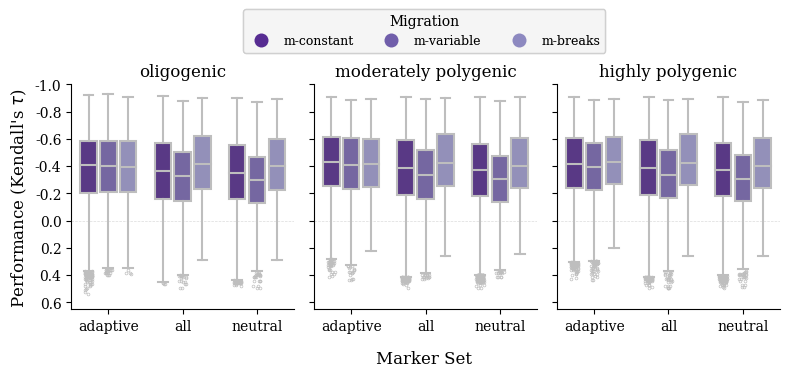

lfmm2
lfmm2
num_levels = 180 num_reps = 10
2-trait sims
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_lfmm2_garden_performance_2-trait.pdf


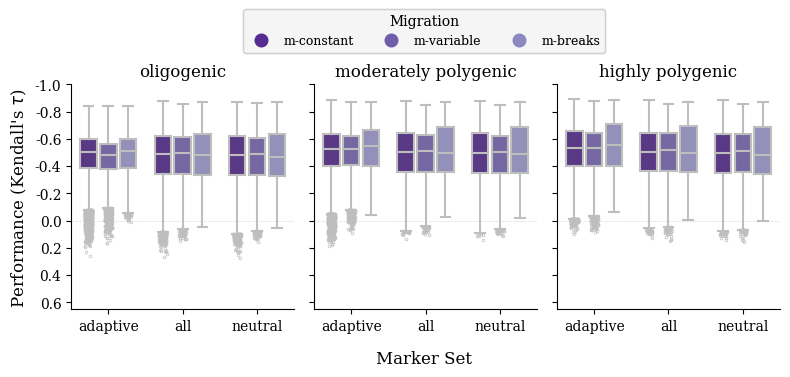

GF
GF
num_levels = 180 num_reps = 10
2-trait sims
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_GF_garden_performance_2-trait.pdf


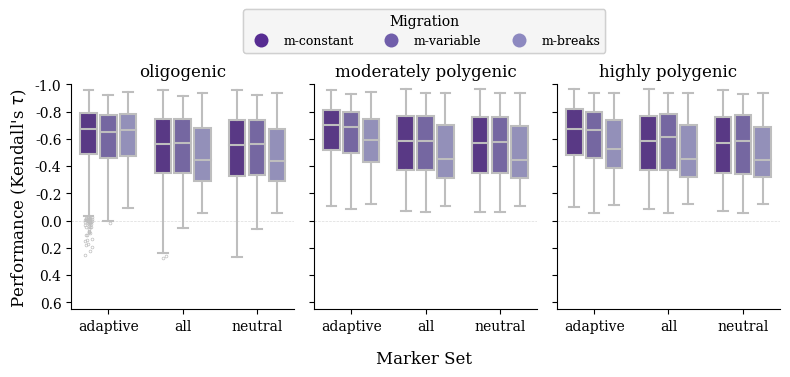

rda
rda
num_levels = 180 num_reps = 10
2-trait sims
structure corr + uncorr
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_rda_garden_performance_2-trait_structure_corr_+_uncorr.pdf


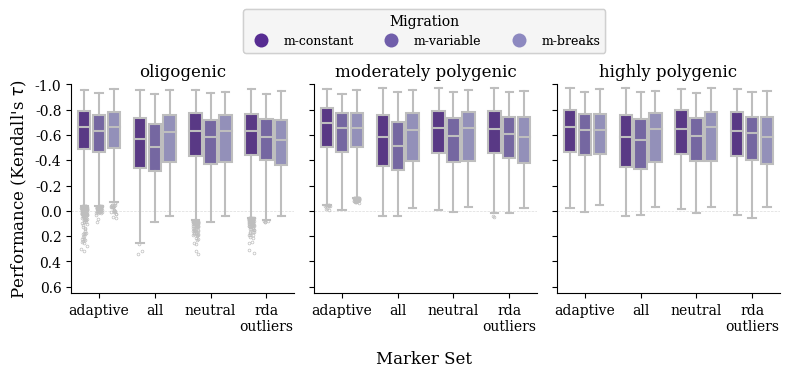

rda
rda
num_levels = 180 num_reps = 10
2-trait sims
uncorrected for structure
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_rda_garden_performance_2-trait_nocorr.pdf


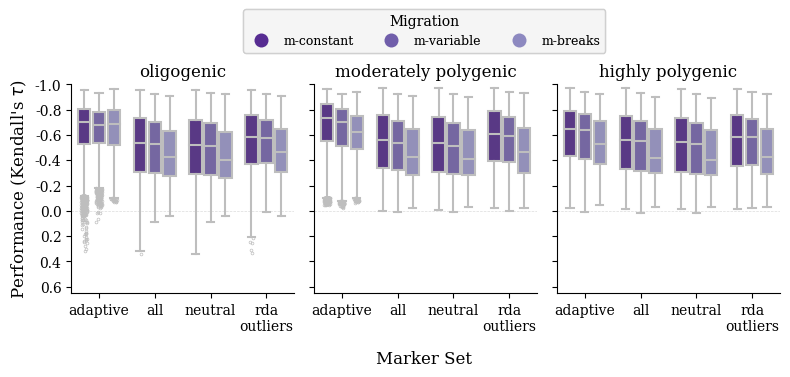

rda
rda
num_levels = 180 num_reps = 10
2-trait sims
corrected for structure
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_rda_garden_performance_2-trait_structcorr.pdf


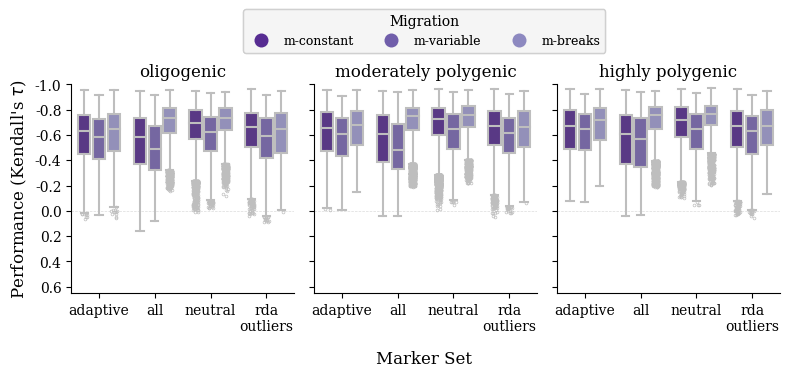

In [17]:
mvp.run_facetgrid_figs(glevel_migration_fig, 'glevel_migration_fig', all_scores, plevel='2-trait')

# glevel vs adding non-causal envs to offset training

- sims with 

    1) one selective env but two were used to train offset ('one noncausal'), or 
    
    2) 2-traits and both envs used for offset ('all causal'), or 
    
    3) one selective env and one env used for offset ('no noncausal')

In [18]:
# what happens when non-causal envs are included in offset calculations?
glevel_noncausal_fig = partial(generic_glevel_fig,
                               hue='noncausal_env',
                               hue_order=mvp.hue_order['noncausal_env'],
                               keep_nuisance=True,
#                                bbox_to_anchor=(0.5365, 1.15)
                              )

rda
rda
num_levels = 225 num_reps = 10
1- or 2-trait sims
structure corr + uncorr
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_noncausal_fig_rda_garden_performance_1-or-2-trait_structure corr_+_uncorr.pdf


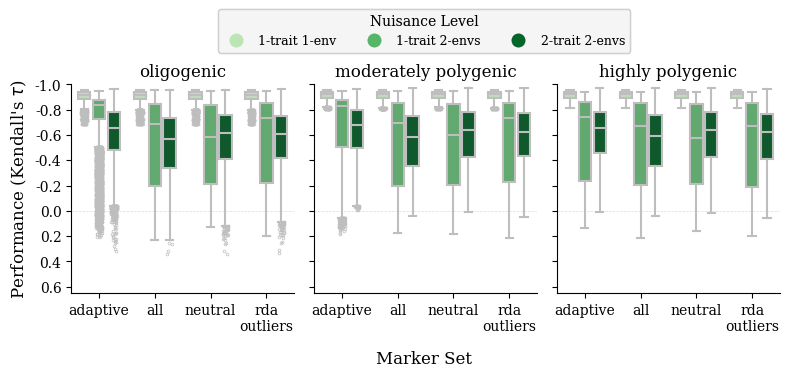

lfmm2
lfmm2
num_levels = 225 num_reps = 10
1- or 2-trait sims
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_noncausal_fig_lfmm2_garden_performance_1-or-2-trait.pdf


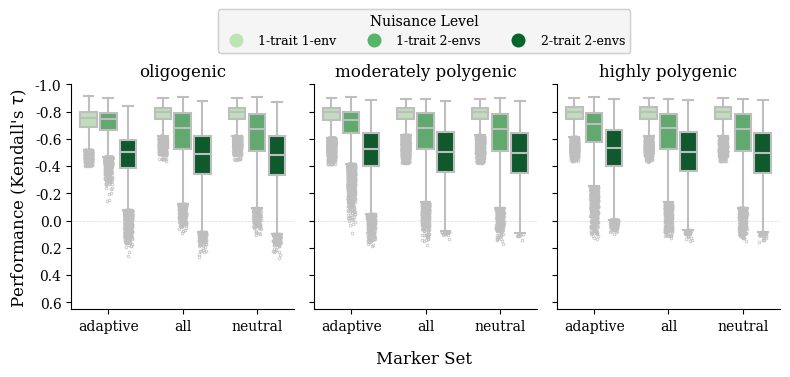

GF
GF
num_levels = 225 num_reps = 10
1- or 2-trait sims
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_noncausal_fig_GF_garden_performance_1-or-2-trait.pdf


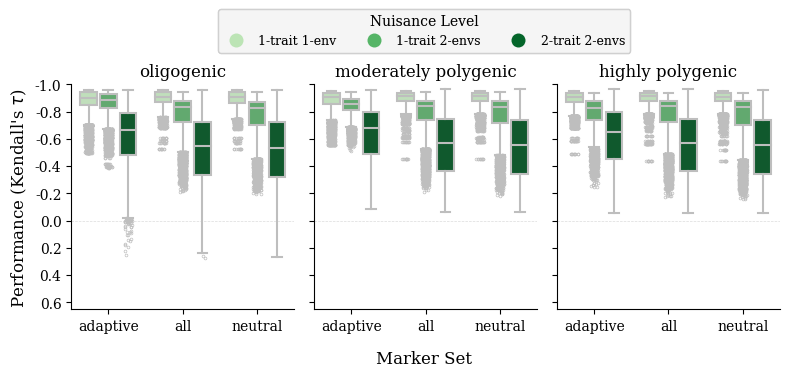

In [19]:
# rda structure-corrected + uncorrected
# lfmm
for program in ['rda', 'lfmm2', 'GF']:    
    data = all_scores[program].copy()
    
    add_title = '\n1- or 2-trait sims'
    if program == 'rda':
        add_title += '\nstructure corr + uncorr'
        add = '_structure corr_+_uncorr'
    else:
        add = ''
    
    glevel_noncausal_fig(
        program, data, add_title=add_title,
        filename=f'glevel_noncausal_fig_{program}_garden_performance_1-or-2-trait{add}.pdf'
    )
    

rda
rda
num_levels = 225 num_reps = 10
1- or 2-trait sims
uncorrected for structure
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_noncausal_fig_rda_garden_performance_1-or-2-trait_nocorr.pdf


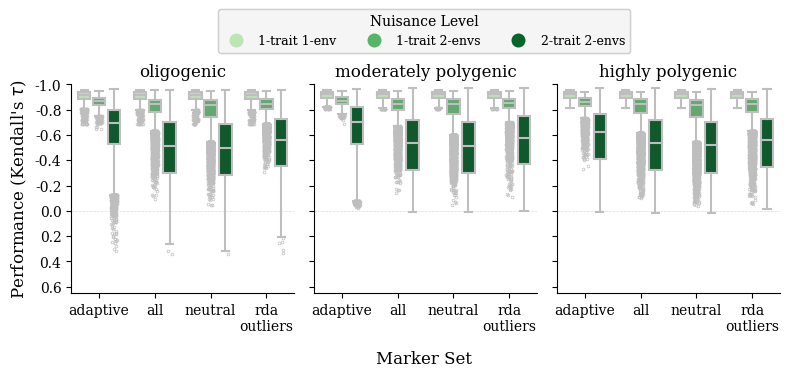

rda
rda
num_levels = 225 num_reps = 10
1- or 2-trait sims
corrected for structure
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_noncausal_fig_rda_garden_performance_1-or-2-trait_structcorr.pdf


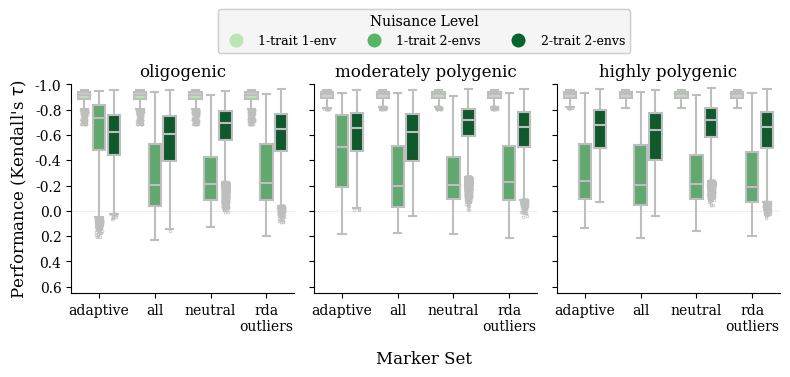

In [20]:
# compare RDA structure-corrected vs structure uncorrected (two figs)
for structcrxn in ['nocorr', 'structcorr']:
    data = all_scores['rda'].copy()
    
    # filter for structure correction (or not)
    data = data[data['structcrxn'] == structcrxn]
    
    add_title = '\n1- or 2-trait sims'
    add_title += '\nuncorrected for structure' if structcrxn == 'nocorr' else '\ncorrected for structure'
    
    glevel_noncausal_fig(
        'rda', data, add_title=add_title,
        filename=f'glevel_noncausal_fig_rda_garden_performance_1-or-2-trait_{structcrxn}.pdf'
    )

In [21]:
formatclock(dt.now() - t1, exact=True)

'0-00:04:03'